# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [78]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress




# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study=pd.merge(mouse_metadata,study_results,on="Mouse ID")
# Display the data table for preview
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [79]:
# Checking the number of mice.
print(f'We have a total of {(mouse_study["Mouse ID"].nunique())} mices.')

We have a total of 249 mices.


In [80]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice=mouse_study.loc[mouse_study.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [81]:
# Optional: Get all the data for the duplicate mouse ID.
duplicated_mice_total=mouse_study.loc[mouse_study["Mouse ID"]==duplicate_mice[0]]
duplicated_mice_total



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [82]:
test=mouse_study.loc[mouse_study["Mouse ID"] == "g989", :]
test.count()

Mouse ID              13
Drug Regimen          13
Sex                   13
Age_months            13
Weight (g)            13
Timepoint             13
Tumor Volume (mm3)    13
Metastatic Sites      13
dtype: int64

In [83]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
rm_duplicate_mouse=mouse_study[mouse_study["Mouse ID"]!=duplicate_mice[0]]
rm_duplicate_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [84]:
# Checking the number of mice in the clean DataFrame.
print(f'Total mice after removing the duplicated mouse is {rm_duplicate_mouse["Mouse ID"].nunique()}.')

Total mice after removing the duplicated mouse is 248.


## Summary Statistics

In [85]:
mean_summary=(rm_duplicate_mouse["Tumor Volume (mm3)"].groupby(rm_duplicate_mouse["Drug Regimen"])).mean()
median_summary=(rm_duplicate_mouse["Tumor Volume (mm3)"].groupby(rm_duplicate_mouse["Drug Regimen"])).median()
variance_summary=(rm_duplicate_mouse["Tumor Volume (mm3)"].groupby(rm_duplicate_mouse["Drug Regimen"])).var()
standard_deviation_summary=(rm_duplicate_mouse["Tumor Volume (mm3)"].groupby(rm_duplicate_mouse["Drug Regimen"])).std()
sem_summary=(rm_duplicate_mouse["Tumor Volume (mm3)"].groupby(rm_duplicate_mouse["Drug Regimen"])).sem()
summary_stats=pd.DataFrame({"Mean":mean_summary,"Median": median_summary, "Variance":variance_summary, "Standard deviation": standard_deviation_summary, "SEM": sem_summary})
summary_stats



,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [86]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.


## Bar and Pie Charts

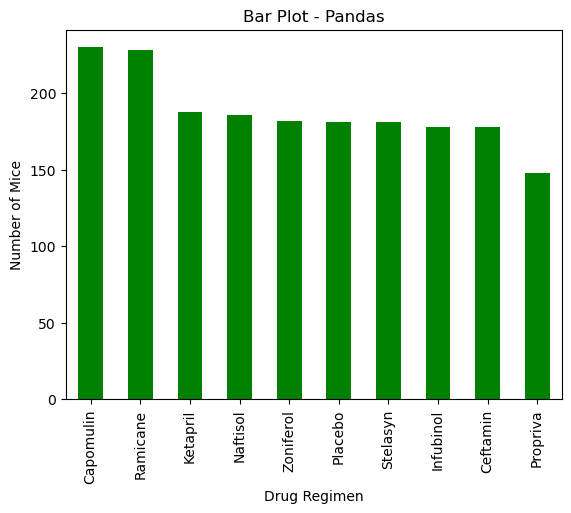

In [87]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
panda_pie=(rm_duplicate_mouse["Drug Regimen"].value_counts()).plot.bar(color='g')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title('Bar Plot - Pandas')
plt.savefig('Bar Plot - Pandas')
plt.show()

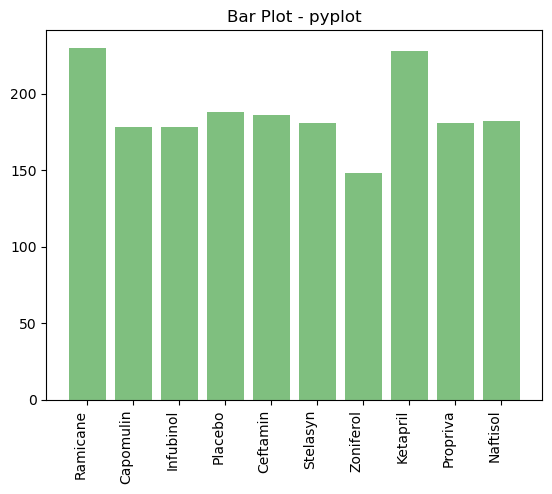

In [88]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis=rm_duplicate_mouse["Timepoint"].groupby(rm_duplicate_mouse["Drug Regimen"]).count()
drug_regimen=rm_duplicate_mouse["Drug Regimen"].unique()
plt.bar( drug_regimen,x_axis, color='g', alpha=0.5, align="center")
plt.xticks(rotation=90, ha='right')
plt.title('Bar Plot - pyplot')
plt.savefig('Bar Plot - pyplot')
plt.show()

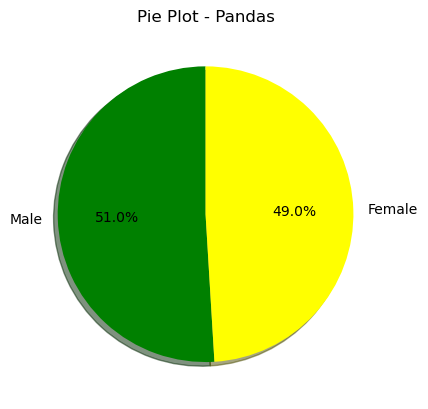

In [89]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender=rm_duplicate_mouse['Sex']
colors=["green","yellow"]
plt.pie(gender.value_counts(), labels=gender.unique(), colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title('Pie Plot - Pandas')
plt.savefig('Pie Plot - Pandas')
plt.show()


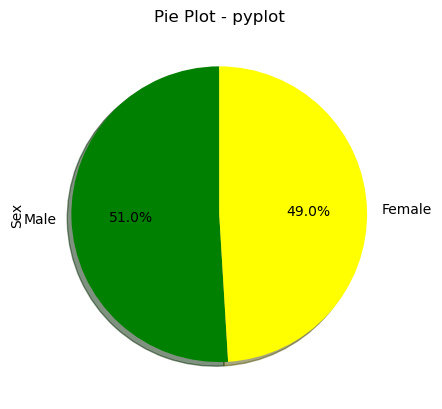

In [90]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
values=[gender[gender=='Male'].count()/gender.count()*100,(gender[gender=='Female']).count()/gender.count()*100]
pyplot = (gender.value_counts()).plot.pie(y=values, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
pyplot.set_title('Pie Plot - pyplot')
plt.savefig('Pie Plot - pyplot')
plt.show()

## Quartiles, Outliers and Boxplots

In [91]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulion=rm_duplicate_mouse.loc[rm_duplicate_mouse["Drug Regimen"] == "Capomulin"]
ramicane=rm_duplicate_mouse.loc[rm_duplicate_mouse["Drug Regimen"] == "Ramicane"]
infubinol=rm_duplicate_mouse.loc[rm_duplicate_mouse["Drug Regimen"] == "Infubinol"]
ceftamin=rm_duplicate_mouse.loc[rm_duplicate_mouse["Drug Regimen"] == "Ceftamin"]
# Start by getting the last (greatest) timepoint for each mouse
capomution_groupby=capomulion.groupby('Mouse ID')
max_value_1=capomution_groupby['Timepoint'].max()

ramicane_groupby=ramicane.groupby('Mouse ID')
max_value_2=ramicane_groupby['Timepoint'].max()

infubinol_groupby=infubinol.groupby('Mouse ID')
max_value_3=infubinol_groupby['Timepoint'].max()

ceftamin_groupby=ceftamin.groupby('Mouse ID')
max_value_4=ceftamin_groupby['Timepoint'].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_merge1=pd.merge(pd.DataFrame(max_value_1), rm_duplicate_mouse, on=('Mouse ID', "Timepoint"),how="left")
max_merge2=pd.merge(pd.DataFrame(max_value_2), rm_duplicate_mouse, on=('Mouse ID', "Timepoint"),how="left")
max_merge3=pd.merge(pd.DataFrame(max_value_3), rm_duplicate_mouse, on=('Mouse ID', "Timepoint"),how="left")
max_merge4=pd.merge(pd.DataFrame(max_value_4), rm_duplicate_mouse, on=('Mouse ID', "Timepoint"),how="left")

In [92]:
capomulin_tumor=max_merge1["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
capomulin_upper_qt=capomulin_tumor[0.25]
capomulin_lower_qt=capomulin_tumor[0.75]
capomulin_inter_qt=capomulin_upper_qt-capomulin_lower_qt
capomulin_median_qt=capomulin_tumor[0.5]
capomulin_lower_bound=capomulin_lower_qt-(capomulin_inter_qt*1.5)
capomulin_upper_bound=capomulin_upper_qt+(capomulin_inter_qt*1.5)

ramicane_tumor=max_merge2["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
ramicane_upper_qt=ramicane_tumor[0.25]
ramicane_lower_qt=ramicane_tumor[0.75]
ramicane_inter_qt=ramicane_upper_qt-ramicane_lower_qt
ramicane_median_qt=ramicane_tumor[0.5]
ramicane_lower_bound=ramicane_lower_qt-(ramicane_inter_qt*1.5)
ramicane_upper_bound=ramicane_upper_qt+(ramicane_inter_qt*1.5)

infubinol_tumor=max_merge3["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
infubinol_upper_qt=infubinol_tumor[0.25]
infubinol_lower_qt=infubinol_tumor[0.75]
infubinol_inter_qt=infubinol_upper_qt-infubinol_lower_qt
infubinol_median_qt=infubinol_tumor[0.5]
infubinol_lower_bound=infubinol_lower_qt-(infubinol_inter_qt*1.5)
infubinol_upper_bound=infubinol_upper_qt+(infubinol_inter_qt*1.5)

ceftamin_tumor=max_merge4["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
ceftamin_upper_qt=ceftamin_tumor[0.25]
ceftamin_lower_qt=ceftamin_tumor[0.75]
ceftamin_inter_qt=ceftamin_upper_qt-ceftamin_lower_qt
ceftamin_median_qt=ceftamin_tumor[0.5]
ceftamin_lower_bound=ceftamin_lower_qt-(ceftamin_inter_qt*1.5)
ceftamin_upper_bound=ceftamin_upper_qt+(ceftamin_inter_qt*1.5)

print('Capomulin tumor')
print(f'Lower quantile: {capomulin_lower_qt}')
print(f'Upper quantile: {capomulin_upper_qt}')
print(f'Interquantile: {capomulin_inter_qt}')
print(f'Median quantile: {capomulin_median_qt}')
print(f"Lower bound: {capomulin_upper_bound}")
print(f"Uppser bound: {capomulin_lower_bound}")

print('')
print('Ramicane tumor')
print(f'Lower quantile: {ramicane_lower_qt}')
print(f'Upper quantile: {ramicane_upper_qt}')
print(f'Interquantile: {ramicane_inter_qt}')
print(f'Median quantile: {ramicane_median_qt}')
print(f"Lower bound: {ramicane_lower_bound}")
print(f"Uppser bound: {ramicane_upper_bound}")

print('')
print('Infubinol tumor')
print(f'Lower quantile: {infubinol_lower_qt}')
print(f'Upper quantile: {infubinol_upper_qt}')
print(f'Interquantile: {infubinol_inter_qt}')
print(f'Median quantile: {infubinol_median_qt}')
print(f"Lower bound: {infubinol_lower_bound}")
print(f"Uppser bound: {infubinol_upper_bound}")

print('')
print('Ceftamin tumor')
print(f'Lower quantile: {ceftamin_lower_qt}')
print(f'Upper quantile: {ceftamin_upper_qt}')
print(f'Interquantile: {ceftamin_inter_qt}')
print(f'Median quantile: {ceftamin_median_qt}')
print(f"Lower bound: {ceftamin_lower_bound}")
print(f"Uppser bound: {ceftamin_upper_bound}")




Capomulin tumor
Lower quantile: 40.1592203
Upper quantile: 32.37735684
Interquantile: -7.781863460000004
Median quantile: 38.1251644
Lower bound: 20.70456164999999
Uppser bound: 51.83201549

Ramicane tumor
Lower quantile: 40.65900627
Upper quantile: 31.56046955
Interquantile: -9.098536719999998
Median quantile: 36.56165229
Lower bound: 54.30681135
Uppser bound: 17.912664470000003

Infubinol tumor
Lower quantile: 65.52574285
Upper quantile: 54.04860769
Interquantile: -11.477135160000003
Median quantile: 60.16518046
Lower bound: 82.74144559000001
Uppser bound: 36.83290494999999

Ceftamin tumor
Lower quantile: 64.29983003
Upper quantile: 48.72207785
Interquantile: -15.577752179999997
Median quantile: 59.85195552
Lower bound: 87.66645829999999
Uppser bound: 25.355449580000002


In [93]:
max_merge1.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [94]:
max_merge2.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [95]:
max_merge3.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [96]:
max_merge4.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


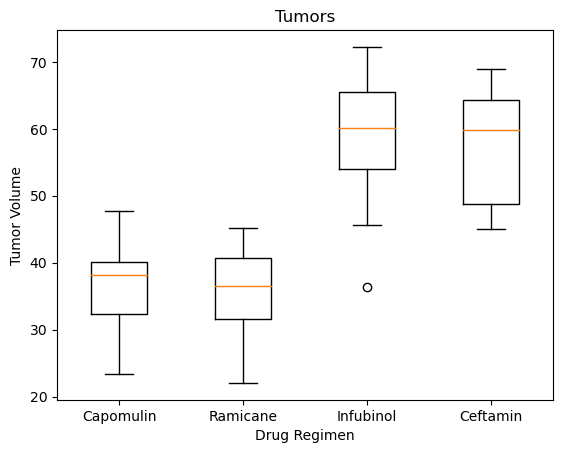

In [97]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumors = [max_merge1["Tumor Volume (mm3)"],max_merge2["Tumor Volume (mm3)"],max_merge3["Tumor Volume (mm3)"],max_merge4["Tumor Volume (mm3)"]]
tumor_box_plot, tumor_bpt = plt.subplots()
tumor_bpt.boxplot(tumors, labels=["Capomulin","Ramicane","Infubinol","Ceftamin"])
tumor_bpt.set_title('Tumors')
tumor_bpt.set_ylabel('Tumor Volume')
tumor_bpt.set_xlabel('Drug Regimen')
plt.savefig('box_plot')


## Line and Scatter Plots

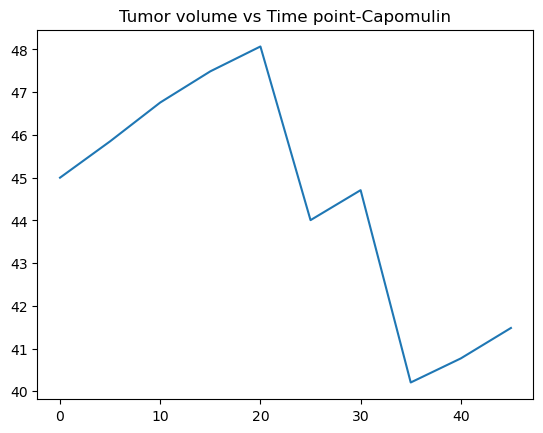

In [98]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x=(rm_duplicate_mouse.loc[rm_duplicate_mouse["Mouse ID"]=="l509"])["Timepoint"]
y=(rm_duplicate_mouse.loc[rm_duplicate_mouse["Mouse ID"]=="l509"])["Tumor Volume (mm3)"]
plt.plot(x,y)
plt.title("Tumor volume vs Time point-Capomulin")
plt.savefig("Tumor volume vs Time point-Capomulin")

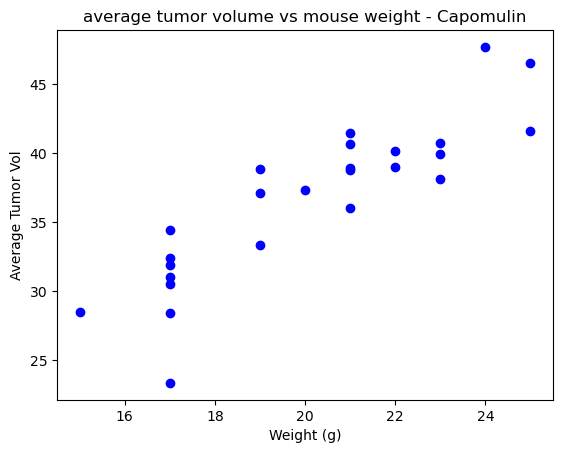

In [99]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tumor=max_merge1.groupby(["Mouse ID"]).mean()
plt.scatter(avg_tumor["Weight (g)"],avg_tumor["Tumor Volume (mm3)"],color="b")
plt.title("average tumor volume vs mouse weight - Capomulin")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Vol')
plt.savefig("average tumor vol v weight")


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.8767060403658116.


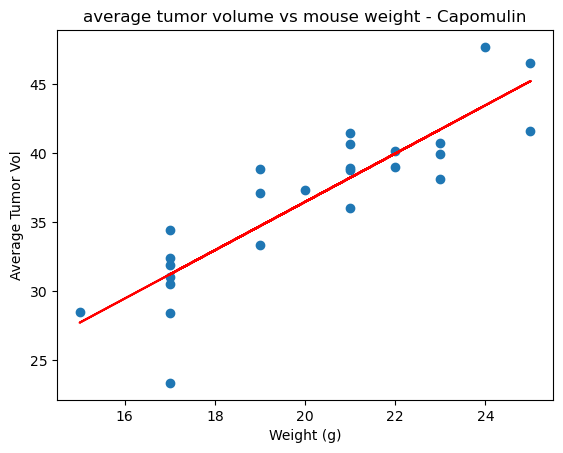

In [102]:
# Calculate the correlation coefficient and linear regression model 
correlation=st.pearsonr(avg_tumor['Tumor Volume (mm3)'],avg_tumor["Weight (g)"])
print(f'The correlation between mouse weight and the average tumor volume is {correlation[0]}.')

# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_tumor["Weight (g)"],avg_tumor["Tumor Volume (mm3)"])
regress_values =  avg_tumor["Weight (g)"]* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(avg_tumor["Weight (g)"],avg_tumor["Tumor Volume (mm3)"])
plt.plot(avg_tumor["Weight (g)"],regress_values,"r-")
plt.title("average tumor volume vs mouse weight - Capomulin")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Vol')
plt.savefig("average tumor vol v weight (linear regression)")